In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from keras.layers import GRU, Dropout, Dense, Input

2024-04-03 09:28:37.692950: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 09:28:37.693111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 09:28:37.911373: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Exploratory Analysis

In [2]:
df = pd.read_csv('/kaggle/input/nifty50-stock-market-data/ASIANPAINT.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [4]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1247.000952,1247.683952,1264.625349,1230.900697,1247.317132,1247.410903,1247.799926,5.096721e+05,6.942919e+13,41346.011401,2.751281e+05,0.625572
std,1074.399506,1074.025577,1087.238871,1062.629409,1074.432667,1074.476439,1075.057438,8.535993e+05,1.443973e+14,36435.449733,4.157465e+05,0.187597
min,210.750000,210.000000,215.750000,204.000000,210.600000,210.750000,212.220000,2.500000e+01,1.278415e+09,70.000000,2.500000e+01,0.076800
25%,415.737500,415.000000,424.950000,410.000000,416.000000,416.262500,415.692500,1.370750e+04,7.538133e+11,16264.750000,1.262200e+04,0.486200
50%,889.375000,890.000000,903.975000,878.075000,890.000000,889.475000,888.350000,5.713600e+04,1.109437e+13,32402.500000,5.273800e+04,0.616100
75%,1599.037500,1599.800000,1629.675000,1573.037500,1602.500000,1600.762500,1600.982500,8.077905e+05,7.761479e+13,54727.500000,4.383750e+05,0.765500
max,5213.100000,5221.100000,5247.750000,5150.050000,5221.100000,5213.100000,5175.790000,1.154594e+07,2.216650e+15,351347.000000,7.938427e+06,1.000000


In [5]:
for i in df.columns:
    if df[i].dtype == 'object':
        print('col name:', df[i].value_counts(), '\n\n', '-----'*5)

col name: Date
2000-01-03    1
2014-03-10    1
2014-03-06    1
2014-03-05    1
2014-03-04    1
             ..
2007-01-16    1
2007-01-15    1
2007-01-12    1
2007-01-11    1
2021-04-30    1
Name: count, Length: 5306, dtype: int64 

 -------------------------
col name: Symbol
ASIANPAINT    5306
Name: count, dtype: int64 

 -------------------------
col name: Series
EQ    5306
Name: count, dtype: int64 

 -------------------------


In [6]:
for col in df.columns:
    if df[col].dtype == 'float64': 
        print(f'Max and Min value in {col} are: {max(df[col])} and {min(df[col])}')
        print(f'\t\t\tmean is {df[col].mean()}')

Max and Min value in Prev Close are: 5213.1 and 210.75
			mean is 1247.0009517527328
Max and Min value in Open are: 5221.1 and 210.0
			mean is 1247.6839521296647
Max and Min value in High are: 5247.75 and 215.75
			mean is 1264.625348661892
Max and Min value in Low are: 5150.05 and 204.0
			mean is 1230.9006973237842
Max and Min value in Last are: 5221.1 and 210.6
			mean is 1247.3171315491895
Max and Min value in Close are: 5213.1 and 210.75
			mean is 1247.410902751602
Max and Min value in VWAP are: 5175.79 and 212.22
			mean is 1247.7999264983039
Max and Min value in Turnover are: 2216650151945000.0 and 1278415000.0
			mean is 69429185649621.18
Max and Min value in Trades are: nan and nan
			mean is 41346.01140065146
Max and Min value in Deliverable Volume are: nan and nan
			mean is 275128.10339795705
Max and Min value in %Deliverble are: nan and nan
			mean is 0.6255723785699395


# Feature Engineering and Selection

In [7]:
df_cleaned = df.copy()

In [8]:
df_cleaned.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


In [9]:
df_cleaned.drop(columns=['Symbol', 'Series'], inplace=True)

<div style='background-color: #e1d9f0; text-align: center; border-radius: 20px; font-size:20px; color:black'>Volume-weighted average price (VWAP) is a financial metric that measures the average price of a security or asset traded during a trading session, adjusted for the total volume of transactions. It's calculated using the opening price for each day, adjusted in real time until the close of the session. The formula for VWAP is: VWAP = (Cumulative typical price x volume)/cumulative volume.</div>

- Date: This column can be useful for sorting and organizing the data. However, it may not directly contribute to the prediction unless you engineer features like day of the week, month, etc.

- Prev Close: The previous day's closing price can provide important information about the trend and momentum of the stock.

- Open: The opening price of the stock on the current day provides the starting point for trading activity and can influence subsequent price movements.

- High: The highest price reached during the trading day can indicate bullish momentum or resistance levels.

- Low: The lowest price reached during the trading day can indicate bearish momentum or support levels.

- Last: The last traded price before the close can provide additional information about intraday trading dynamics.

- Close: The closing price of the stock on the current day is often the most important for analysis and prediction tasks.

- Volume: Trading volume represents the number of shares traded during the day and can provide insights into market interest and liquidity.

- Turnover: Turnover represents the total value of stocks traded during the day and can provide additional context, especially in conjunction with volume.

- Trades: The number of trades executed during the day can provide insights into market activity and investor sentiment.

- Deliverable Volume: The volume of shares that were delivered (settled) during the trading day can provide insights into investor behavior and institutional trading.

- %Deliverble: The percentage of deliverable volume relative to total volume can provide insights into the quality of trading activity and investor participation.

In [10]:
df_cleaned.columns

Index(['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'],
      dtype='object')

In [11]:
df_cleaned.drop(columns=['Deliverable Volume', 'Trades', '%Deliverble', 'Last', 'Turnover', 'Volume', 'High', 'Low'], inplace=True)

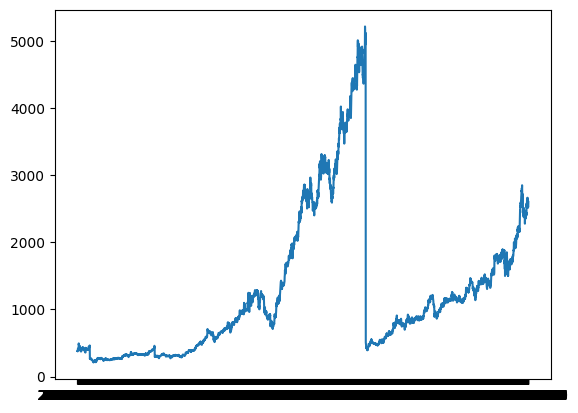

In [12]:
plt.plot(df_cleaned.Date, df_cleaned.Close)
plt.show()

In [13]:
df_cleaned.set_index(keys='Date', inplace=True)

In [14]:
df_cleaned['Avg_ma_close'] = df_cleaned.iloc[:, 0].expanding(min_periods=3).mean()

In [15]:
df_cleaned.dropna(inplace=True)

# Splitting data

In [16]:
X = df_cleaned.drop(columns='Close').values
y = df_cleaned['Close'].values

In [17]:
X

array([[ 385.55      ,  371.5       ,  379.81      ,  376.13333333],
       [ 383.        ,  384.9       ,  379.88      ,  377.85      ],
       [ 377.5       ,  376.        ,  383.38      ,  377.78      ],
       ...,
       [2574.35      , 2588.        , 2605.91      , 1246.48549208],
       [2614.55      , 2630.        , 2607.33      , 1246.74337418],
       [2613.45      , 2595.        , 2558.66      , 1247.00095175]])

In [18]:
X.shape

(5304, 4)

<div style='background-color: #8f5774; text-align: center; border-radius: 20px; font-size:20px'>
In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values. 
By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. 
</div>


In [19]:
x_robust_scaler = RobustScaler()
y_robust_scaler = RobustScaler()
X = x_robust_scaler.fit_transform(X)
y = y_robust_scaler.fit_transform(y.reshape(-1, 1))

In [20]:
x_minmax_scaler = MinMaxScaler()
y_minmax_scaler = MinMaxScaler()
X = x_minmax_scaler.fit_transform(X)
y = y_minmax_scaler.fit_transform(y)

In [21]:
X_train = X[:4000]
X_test = X[4000:]

y_train = y[:4000]
y_test = y[4000:]

In [22]:
X_train.shape

(4000, 4)

In [23]:
y_train.shape

(4000, 1)

In [24]:
X_train = X_train.reshape((-1,1,4))
X_test = X_test.reshape((-1,1,4))

# Training Model

In [25]:
model = tf.keras.Sequential([
    Input((1, 4)),
    GRU(units=214, return_sequences=True),
    Dropout(0.2),
    GRU(units=214),
    Dropout(0.2),
    Dense(units=1, activation='linear')
])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 214)         │       141,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 214)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 214)            │       276,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 214)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           215 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417,515 (1.59 MB)

 Trainable params: 417,515 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 10,
    monitor='val_loss'
)

In [28]:
model.compile(loss='mse', optimizer='adam')

In [29]:
history = model.fit(
    X_train,
    y_train,
    batch_size=250, 
    epochs=100, 
    validation_split=0.15,
    callbacks = [early_stopping]
)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0544 - val_loss: 0.0627
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030 - val_loss: 0.0339
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0018 - val_loss: 0.0200
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.3608e-04 - val_loss: 0.0226
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.6940e-04 - val_loss: 0.0165
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.2915e-04 - val_loss: 0.0123
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5.3365e-04 - val_loss: 0.0086
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.7595e-04 - val_loss: 0.0062
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.0004e-04 - val_loss: 0.0038
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.0339e-04 - val_loss: 0.0024
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.2123e-04 - val_loss: 0.0015
Epoch 12/100
14/14 ━

# Evaluating Model

In [30]:
model.evaluate(X_test, y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3512e-06


1.2935222912346944e-05

In [31]:
y_pred = model.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [32]:
y_test = y_minmax_scaler.inverse_transform(y_test)
y_pred = y_minmax_scaler.inverse_transform(y_pred) 

y_test = y_robust_scaler.inverse_transform(y_test)
y_pred = y_robust_scaler.inverse_transform(y_pred) 

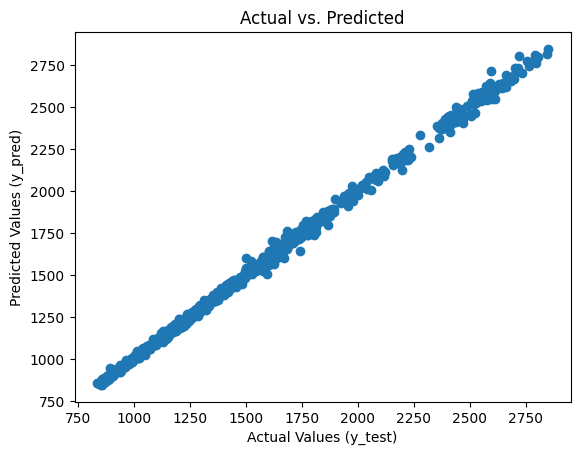

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted")
plt.show()